<a href="https://colab.research.google.com/github/saritmaitra/Forex_VAR-VECM/blob/main/VECM_7series_WalkforwardValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

author: @ Sarit Maitra

Fitting VECM with half of data to validate; 

-> Step 5: Estimating the VECM model by maximum likelihood method, test validations by visual diagnostic or correlogram, and checking that residuals from the model are white noise.


In [ ]:
print('Necessary libraries & dependencies')
!pip install pyforest
from pyforest import *
import datetime, pickle, copy, warnings, math
from pandas import DataFrame, merge, concat
plt.style.use('dark_background')
from google.colab import files
!pip install arch
from arch.unitroot import DFGLS
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from numpy import sqrt
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.vector_ar import vecm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip 

In [ ]:
uploaded = files.upload()
print('view data...')
original = pd.read_csv("series_7_1.csv")
original = original.set_index('timestamp')
original = original.sort_index(ascending=True)

Saving series_7_1.csv to series_7_1.csv
view data...


<IPython.core.display.Javascript object>

In [ ]:
#original_log = np.log(original)
#original_log

In [ ]:
original

,es,eurusd,gbpusd,gc,usdjpy,zbm0,eurchf
timestamp,,,,,,,
2020-04-01 00:00:00,2540.375,1102770.0,1241055.0,1591.90,107463000.0,179.953125,1060370.0
2020-04-01 00:01:00,2538.125,1103015.0,1241150.0,1590.90,107419500.0,179.953125,1060435.0
2020-04-01 00:02:00,2538.375,1102830.0,1241100.0,1591.55,107437000.0,179.921875,1060055.0
2020-04-01 00:03:00,2537.750,1102735.0,1241100.0,1591.00,107382500.0,179.921875,1059870.0
2020-04-01 00:04:00,2535.250,1102780.0,1241860.0,1590.60,107356500.0,179.921875,1059870.0
...,...,...,...,...,...,...,...
2020-04-30 23:55:00,2870.625,1094390.0,1258030.0,1695.50,107279500.0,180.921875,1057785.0
2020-04-30 23:56:00,2872.125,1094390.0,1257990.0,1695.35,107304000.0,180.890625,1057920.0
2020-04-30 23:57:00,2872.500,1094465.0,1258085.0,1695.45,107295500.0,180.906250,1057905.0


In [ ]:
max_lag = 6
test = 'ssr_chi2test'
def causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
  X = DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
  for c in X.columns:
    for r in X.index:
      test_result = grangercausalitytests(data[[r, c]], maxlag = max_lag, verbose = False)
      p_values = [round(test_result[i+1][0][test][1],4) for i in range(max_lag)]
      if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
      min_p_value = np.min(p_values)
      X.loc[r, c] = min_p_value
    X.columns = [var + '-x axis' for var in variables]
    X.index = [var + '-y axis' for var in variables]
    return X
causation_matrix(original, variables = original.columns) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,es-x axis,eurusd-x axis,gbpusd-x axis,gc-x axis,usdjpy-x axis,zbm0-x axis,eurchf-x axis
es-y axis,1.0000,0.0,0.0,0.0,0.0,0.0,0.0
eurusd-y axis,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
gbpusd-y axis,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
gc-y axis,0.0008,0.0,0.0,0.0,0.0,0.0,0.0
usdjpy-y axis,0.0001,0.0,0.0,0.0,0.0,0.0,0.0
zbm0-y axis,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
eurchf-y axis,0.0001,0.0,0.0,0.0,0.0,0.0,0.0


# 1 Vector error correction model:

VECM allows to model jointly short-term dynamics (variables in first difference) and long-term dynamics (variables at level).

We have determined the lag length earlier, trend specification and the number of cointegrating relationships, we can fit the VECM model.

In [ ]:
# VECM
model = vecm.VECM(original[:15000].values, k_ar_diff = 6, coint_rank = 5, deterministic='co')

"""
k_ar_diff = lag length
set the deterministic argument to "co", meaning that there
is a constant inside the cointegrating relationship
"""
res = model.fit()
print(res.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation y1
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.8553     33.263     -0.717      0.473     -89.050      41.340
L1.y1          0.0016      0.010      0.165      0.869      -0.017       0.020
L1.y2         -0.0002   6.29e-05     -3.691      0.000      -0.000      -0.000
L1.y3      -9.356e-05   3.48e-05     -2.692      0.007      -0.000   -2.54e-05
L1.y4          0.0283      0.019      1.455      0.146      -0.010       0.066
L1.y5      -3.159e-06   6.68e-07     -4.730      0.000   -4.47e-06   -1.85e-06
L1.y6         -0.2000      0.517     -0.387      0.699      -1.213       0.813
L1.y7          0.0010      0.000      8.426      0.000       0.001       0.001
L2.y1          0.0042      0.010      0.440      0.660      -0.015       0.023
L2.y2         -0.0007   6.86e-05    -10.412      

## 1.2 Residuals diagonistics:

In [ ]:
print(res.test_normality())

<statsmodels.tsa.vector_ar.hypothesis_test_results.NormalityTestResults object. H_0: data generated by normally-distributed process: reject at 5% significance level. Test statistic: 12362958858.065, critical value: 23.685>, p-value: 0.000>


### 1.2.1 Durbin Watson:

In [ ]:
out = durbin_watson(res.resid)
for col, val in zip(original.columns, out):
    print((col), ':', round(val, 2))

es : 2.0
eurusd : 2.0
gbpusd : 2.0
gc : 2.0
usdjpy : 1.99
zbm0 : 2.0
eurchf : 2.0


In [ ]:
residuals = res.resid

name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(residuals)
print(lzip(name, test)); print()
print('Correlation matrix:')
residuals = DataFrame(residuals, columns = original.columns)
print(residuals.corr()); print() # correlation matrix
print('Summary statistic:')
print(residuals.describe().transpose()) # statistic


[('Jarque-Bera', array([4.74752060e+08, 2.27949822e+08, 9.95752645e+09, 2.37818206e+09,
       1.11272827e+08, 3.62785471e+05, 1.43439764e+08])), ('Chi^2 two-tail prob.', array([0., 0., 0., 0., 0., 0., 0.])), ('Skew', array([ -5.8424667 , -10.13995971,  39.8071159 ,   1.96292222,
         7.39906363,  -0.06607541,   6.6475093 ])), ('Kurtosis', array([ 874.67735157,  606.72073169, 3994.6340415 , 1954.11568691,
        424.78271749,   27.09793137,  481.99271023]))]

Correlation matrix:
              es    eurusd    gbpusd        gc    usdjpy      zbm0    eurchf
es      1.000000  0.111852  0.042207 -0.477015  0.103354 -0.073002  0.114396
eurusd  0.111852  1.000000  0.189732 -0.007412 -0.145593 -0.022712  0.086581
gbpusd  0.042207  0.189732  1.000000  0.034666 -0.131951 -0.011842  0.249142
gc     -0.477015 -0.007412  0.034666  1.000000 -0.040614 -0.091623 -0.020806
usdjpy  0.103354 -0.145593 -0.131951 -0.040614  1.000000 -0.110769  0.079401
zbm0   -0.073002 -0.022712 -0.011842 -0.091623 -0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1080x720 with 0 Axes>

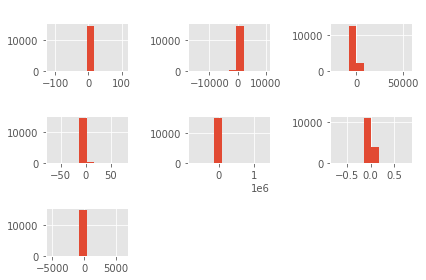

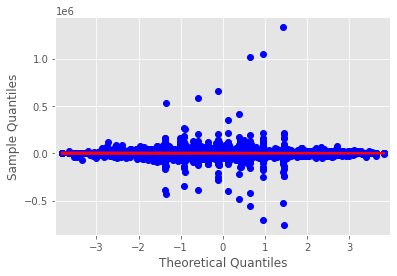

In [ ]:
plt.style.use('ggplot')
# Histogram plot of the forecast residual errors
plt.figure(figsize=(15,10))
residuals.hist()
plt.tight_layout()

from statsmodels.graphics.gofplots import qqplot
residuals = np.array(residuals)
qqplot(residuals, line='r')
plt.show()

In [ ]:
#from pandas.plotting import lag_plot
#lag_plot(original)

In [ ]:
residuals = DataFrame(residuals, columns = original.columns)
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")
        
# ADF Test on each column
for name, column in residuals.iteritems():
    adfuller_test(column, name=column.name)
    print()

    Augmented Dickey-Fuller Test on "es" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -32.3005
 No. Lags Chosen       = 18
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.

    Augmented Dickey-Fuller Test on "eurusd" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -46.9339
 No. Lags Chosen       = 7
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.

    Augmented Dickey-Fuller Test on "gbpusd" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.

## 1.3 Forecast:

In [ ]:
n_obs = 2
pd.options.display.float_format = "{:.2f}".format
fcast, lower, upper = res.predict(n_obs, 0.01)
print("lower bounds of confidence intervals:")
print(lower.round(2))
print("\npoint forecasts:")
print(fcast.round(2))
print("\nupper bounds of confidence intervals:")
print(upper.round(2)); print()

fcast = DataFrame(fcast, columns = original.columns)
fcast.index = original[15000:15002].index
print(fcast); print()
print(original[15000:15002])

<IPython.core.display.Javascript object>

lower bounds of confidence intervals:
[[2.75326000e+03 1.09039027e+06 1.25027583e+06 1.73596000e+03
  1.07344541e+08 1.80660000e+02 1.05205349e+06]
 [2.75052000e+03 1.09015015e+06 1.25002373e+06 1.73468000e+03
  1.07318640e+08 1.80610000e+02 1.05195999e+06]]

point forecasts:
[[2.75979000e+03 1.09127445e+06 1.25192648e+06 1.73912000e+03
  1.07427520e+08 1.80760000e+02 1.05250870e+06]
 [2.75975000e+03 1.09122376e+06 1.25185554e+06 1.73914000e+03
  1.07426134e+08 1.80760000e+02 1.05252724e+06]]

upper bounds of confidence intervals:
[[2.76633000e+03 1.09215863e+06 1.25357713e+06 1.74229000e+03
  1.07510499e+08 1.80870000e+02 1.05296391e+06]
 [2.76897000e+03 1.09229738e+06 1.25368735e+06 1.74360000e+03
  1.07533629e+08 1.80910000e+02 1.05309449e+06]]

                         es     eurusd     gbpusd      gc       usdjpy   zbm0     eurchf
timestamp                                                                               
2020-04-15 15:58:00 2759.79 1091274.45 1251926.48 1739.12 10742

In [ ]:
# reversing forecast at original level
#fcast_org = np.exp(fcast)
#fcast_org.index = original[15000:15002].index
#fcast_org

## 1.4 Back-testing:

In [ ]:
train = original[:15000]; test = original[15000:15015]

# VECM
model = vecm.VECM(train.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
# make predictions
predictions = model_fit.predict(len(test))
predictions = DataFrame(predictions, columns = original.columns)
for i in range(len(predictions)):
  print('predicted -> %f, expected -> %f' % (predictions.eurusd[i], test.eurusd[i]))
rmse = sqrt(mean_squared_error(test.eurusd, predictions.eurusd))
print('Test RMSE: %.3f' % rmse)

Lag: 7
predicted -> 1091274.450408, expected -> 1091050.000000
predicted -> 1091223.763795, expected -> 1090825.000000
predicted -> 1091202.318809, expected -> 1090825.000000
predicted -> 1091186.186249, expected -> 1090775.000000
predicted -> 1091158.553923, expected -> 1090705.000000
predicted -> 1091140.300259, expected -> 1090645.000000
predicted -> 1091129.355595, expected -> 1090600.000000
predicted -> 1091115.459455, expected -> 1090475.000000
predicted -> 1091099.898031, expected -> 1090300.000000
predicted -> 1091084.374839, expected -> 1090585.000000
predicted -> 1091068.300607, expected -> 1090515.000000
predicted -> 1091052.937929, expected -> 1090505.000000
predicted -> 1091037.411101, expected -> 1090510.000000
predicted -> 1091021.890172, expected -> 1090835.000000
predicted -> 1091006.827815, expected -> 1090850.000000
Test RMSE: 482.739


Our 2 options here to perform roll forward validation -
- re-train the model each time as new data become available
- use the learned coecients and manually make predictions. 

1st option is computationaly expensive but a valid apporach as per as my knowledge is concern and I have opted for the same as below.

In [ ]:
# walk forward validation: the train set expanding each time step and the test set fixed at one time step ahead
# setting the formula for walk forward validation
X = original[15000:16000].values
n_train = 1
n_records = len(X)

for i in range(n_train, n_records):
    train, test = X[0:i], X[i:i+1]
    print('train=%d, test=%d' % (len(train), len(test)))

In [ ]:
# re-train the model each time as new observations available
n_obs = int(15000) # number of initial observation
train = original[:n_obs]; test = original[n_obs:len(train)+1]
model = vecm.VECM(train.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
# predictions
pred_1 = model_fit.predict(len(test))
pred_1 = DataFrame(pred_1, columns = original.columns)
print('\033[4mEURUSD :: 1st prediction:\033[0m')
for i in range(len(pred_1)):
  print('predicted -> %f, actual -> %f' % (pred_1.eurusd[i], test.eurusd[i])); print()

tr1 = original[:len(train)+1]; te1 = original[len(tr1):len(tr1)+1]
model = vecm.VECM(tr1.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_2 = model_fit.predict(len(te1))
pred_2 = DataFrame(pred_2, columns = original.columns)
print('\033[4mEURUSD :: 2nd prediction:\033[0m')
for i in range(len(pred_2)):
  print('predicted -> %f, actual -> %f' % (pred_2.eurusd[i], te1.eurusd[i])); print()

tr2 = original[:len(train)+2]; te2 = original[len(tr2):len(tr2)+1]
model = vecm.VECM(tr2.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_3 = model_fit.predict(len(te2))
pred_3 = DataFrame(pred_3, columns = original.columns)
print('\033[4mEURUSD :: 3rd prediction:\033[0m')
for i in range(len(pred_3)):
  print('predicted -> %f, actual -> %f' % (pred_3.eurusd[i], te2.eurusd[i])); print()

tr3 = original[:len(train)+3]; te3 = original[len(tr3):len(tr3)+1]
model = vecm.VECM(tr3.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_4 = model_fit.predict(len(te3))
pred_4 = DataFrame(pred_4, columns = original.columns)
print('\033[4mEURUSD :: 4th prediction:\033[0m')
for i in range(len(pred_4)):
  print('predicted -> %f, actual -> %f' % (pred_4.eurusd[i], te3.eurusd[i])); print()

tr4 = original[:len(train)+4]; te4 = original[len(tr4):len(tr4)+1]
model = vecm.VECM(tr4.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_5 = model_fit.predict(len(te4))
pred_5 = DataFrame(pred_5, columns = original.columns)
print('\033[4mEURUSD :: 5th prediction:\033[0m')
for i in range(len(pred_5)):
  print('predicted -> %f, actual -> %f' % (pred_5.eurusd[i], te4.eurusd[i])); print()

tr5 = original[:len(train)+5]; te5 = original[len(tr5):len(tr5)+1]
model = vecm.VECM(tr5.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_6 = model_fit.predict(len(te5))
pred_6 = DataFrame(pred_6, columns = original.columns)
print('\033[4mEURUSD :: 6th prediction:\033[0m')
for i in range(len(pred_6)):
  print('predicted -> %f, actual -> %f' % (pred_6.eurusd[i], te5.eurusd[i])); print()

tr6 = original[:len(train)+6]; te6 = original[len(tr6):len(tr6)+1]
model = vecm.VECM(tr6.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_7 = model_fit.predict(len(te6))
pred_7 = DataFrame(pred_7, columns = original.columns)
print('\033[4mEURUSD :: 7th prediction:\033[0m')
for i in range(len(pred_7)):
  print('predicted -> %f, actual -> %f' % (pred_7.eurusd[i], te6.eurusd[i])); print()

tr7 = original[:len(train)+7]; te7 = original[len(tr7):len(tr7)+1]
model = vecm.VECM(tr7.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_8 = model_fit.predict(len(te7))
pred_8 = DataFrame(pred_8, columns = original.columns)
print('\033[4mEURUSD :: 8th prediction:\033[0m')
for i in range(len(pred_8)):
  print('predicted -> %f, actual -> %f' % (pred_8.eurusd[i], te7.eurusd[i])); print()

tr8 = original[:len(train)+8]; te8 = original[len(tr8):len(tr8)+1]
model = vecm.VECM(tr8.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_9 = model_fit.predict(len(te8))
pred_9 = DataFrame(pred_9, columns = original.columns)
print('\033[4mEURUSD :: 9th prediction:\033[0m')
for i in range(len(pred_9)):
  print('predicted -> %f, actual -> %f' % (pred_9.eurusd[i], te8.eurusd[i])); print()

tr9 = original[:len(train)+9]; te9 = original[len(tr9):len(tr9)+1]
model = vecm.VECM(tr9.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_10 = model_fit.predict(len(te9))
pred_10 = DataFrame(pred_10, columns = original.columns)
print('\033[4mEURUSD :: 10th prediction:\033[0m')
for i in range(len(pred_10)):
  print('predicted -> %f, actual -> %f' % (pred_10.eurusd[i], te9.eurusd[i])); print()

tr10 = original[:len(train)+10]; te10 = original[len(tr10):len(tr10)+1]
model = vecm.VECM(tr10.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_11 = model_fit.predict(len(te10))
pred_11 = DataFrame(predictions, columns = original.columns)
print('\033[4mEURUSD :: 11th prediction:\033[0m')
for i in range(len(pred_11)):
  print('predicted -> %f, actual -> %f' % (pred_11.eurusd[i], te10.eurusd[i])); print()

tr11 = original[:len(train)+11]; te11 = original[len(tr11):len(tr11)+1]
model = vecm.VECM(tr11.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_12 = model_fit.predict(len(te11))
pred_12 = DataFrame(pred_12, columns = original.columns)
print('\033[4mEURUSD :: 12th prediction:\033[0m')
for i in range(len(pred_12)):
  print('predicted -> %f, actual -> %f' % (pred_12.eurusd[i], te11.eurusd[i])); print()

tr12 = original[:len(train)+12]; te12 = original[len(tr12):len(tr12)+1]
model = vecm.VECM(tr12.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_13 = model_fit.predict(len(te12))
pred_13 = DataFrame(pred_13, columns = original.columns)
print('\033[4mEURUSD :: 13th prediction:\033[0m')
for i in range(len(pred_13)):
  print('predicted -> %f, actual -> %f' % (pred_13.eurusd[i], te12.eurusd[i])); print()

tr13 = original[:len(train)+13]; te13 = original[len(tr13):len(tr13)+1]
model = vecm.VECM(tr13.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_14 = model_fit.predict(len(te13))
pred_14 = DataFrame(pred_14, columns = original.columns)
print('\033[4mEURUSD :: 14th prediction:\033[0m')
for i in range(len(pred_14)):
  print('predicted -> %f, actual -> %f' % (pred_14.eurusd[i], te13.eurusd[i])); print()

tr14 = original[:len(train)+14]; te14 = original[len(tr14):len(tr14)+1]
model = vecm.VECM(tr14.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_15 = model_fit.predict(len(te14))
pred_15 = DataFrame(pred_15, columns = original.columns)
print('\033[4mEURUSD :: 15th prediction:\033[0m')
for i in range(len(pred_15)):
  print('predicted -> %f, actual -> %f' % (pred_15.eurusd[i], te14.eurusd[i])); print()

Lag: 7
EURUSD :: 1st prediction:
predicted -> 1091274.450408, actual -> 1091050.000000

EURUSD :: 2nd prediction:
predicted -> 1091091.750036, actual -> 1090825.000000

EURUSD :: 3rd prediction:
predicted -> 1090975.619986, actual -> 1090825.000000

EURUSD :: 4th prediction:
predicted -> 1090904.927227, actual -> 1090775.000000

EURUSD :: 5th prediction:
predicted -> 1090813.626906, actual -> 1090705.000000

EURUSD :: 6th prediction:
predicted -> 1090802.475576, actual -> 1090645.000000

EURUSD :: 7th prediction:
predicted -> 1090720.183543, actual -> 1090600.000000

EURUSD :: 8th prediction:
predicted -> 1090639.749487, actual -> 1090475.000000

EURUSD :: 9th prediction:
predicted -> 1090518.503120, actual -> 1090300.000000

EURUSD :: 10th prediction:
predicted -> 1090377.332967, actual -> 1090585.000000

EURUSD :: 11th prediction:
predicted -> 1090438.036185, actual -> 1090515.000000

EURUSD :: 12th prediction:
predicted -> 1090464.745764, actual -> 1090505.000000

EURUSD :: 13th pre

In [ ]:
print('\033[4mEURCHF :: 1st prediction:\033[0m')
for i in range(len(pred_1)):
  print('predicted -> %f, actual -> %f' % (pred_1.eurchf[i], test.eurchf[i])); print()

print('\033[4mEURCHF :: 2nd prediction:\033[0m')
for i in range(len(pred_2)):
  print('predicted -> %f, actual -> %f' % (pred_2.eurchf[i], te1.eurchf[i])); print()

print('\033[4mEURCHF :: 3rd prediction:\033[0m')
for i in range(len(pred_3)):
  print('predicted -> %f, actual -> %f' % (pred_3.eurchf[i], te2.eurchf[i])); print()

print('\033[4mEURCHF :: 4th prediction:\033[0m')
for i in range(len(pred_4)):
  print('predicted -> %f, actual -> %f' % (pred_4.eurchf[i], te3.eurchf[i])); print()

print('\033[4mEURCHF :: 5th prediction:\033[0m')
for i in range(len(pred_5)):
  print('predicted -> %f, actual -> %f' % (pred_5.eurchf[i], te4.eurchf[i])); print()

print('\033[4mEURCHF :: 6th prediction:\033[0m')
for i in range(len(pred_6)):
  print('predicted -> %f, actual -> %f' % (pred_6.eurchf[i], te5.eurchf[i])); print()

print('\033[4mEURCHF :: 7th prediction:\033[0m')
for i in range(len(pred_7)):
  print('predicted -> %f, actual -> %f' % (pred_7.eurchf[i], te6.eurchf[i])); print()

print('\033[4mEURCHF :: 8th prediction:\033[0m')
for i in range(len(pred_8)):
  print('predicted -> %f, actual -> %f' % (pred_8.eurchf[i], te7.eurchf[i])); print()

print('\033[4mEURCHF :: 9th prediction:\033[0m')
for i in range(len(pred_8)):
  print('predicted -> %f, actual -> %f' % (pred_9.eurchf[i], te8.eurchf[i])); print()

print('\033[4mEURCHF :: 10th prediction:\033[0m')
for i in range(len(pred_10)):
  print('predicted -> %f, actual -> %f' % (pred_10.eurchf[i], te9.eurchf[i])); print()

print('\033[4mEURCHF :: 11th prediction:\033[0m')
for i in range(len(pred_11)):
  print('predicted -> %f, actual -> %f' % (pred_11.eurchf[i], te10.eurchf[i])); print()

print('\033[4mEURCHF :: 12th prediction:\033[0m')
for i in range(len(pred_12)):
  print('predicted -> %f, actual -> %f' % (pred_12.eurchf[i], te11.eurchf[i])); print()

print('\033[4mEURCHF :: 13th prediction:\033[0m')
for i in range(len(pred_13)):
  print('predicted -> %f, actual -> %f' % (pred_13.eurchf[i], te12.eurchf[i])); print()

print('\033[4mEURCHF :: 14th prediction:\033[0m')
for i in range(len(pred_14)):
  print('predicted -> %f, actual -> %f' % (pred_14.eurchf[i], te13.eurchf[i])); print()

print('\033[4mEURCHF :: 15th prediction:\033[0m')
for i in range(len(pred_15)):
  print('predicted -> %f, actual -> %f' % (pred_15.eurchf[i], te14.eurchf[i])); print()

EURCHF :: 1st prediction:
predicted -> 1052508.701807, actual -> 1052555.000000

EURCHF :: 2nd prediction:
predicted -> 1052550.620714, actual -> 1052505.000000

EURCHF :: 3rd prediction:
predicted -> 1052492.822786, actual -> 1052510.000000

EURCHF :: 4th prediction:
predicted -> 1052500.535771, actual -> 1052505.000000

EURCHF :: 5th prediction:
predicted -> 1052481.313653, actual -> 1052455.000000

EURCHF :: 6th prediction:
predicted -> 1052482.032535, actual -> 1052505.000000

EURCHF :: 7th prediction:
predicted -> 1052496.620563, actual -> 1052505.000000

EURCHF :: 8th prediction:
predicted -> 1052530.586904, actual -> 1052505.000000

EURCHF :: 9th prediction:
predicted -> 1052522.480733, actual -> 1052505.000000

EURCHF :: 10th prediction:
predicted -> 1052520.325578, actual -> 1052535.000000

EURCHF :: 11th prediction:
predicted -> 1052504.763960, actual -> 1052505.000000

EURCHF :: 12th prediction:
predicted -> 1052492.324704, actual -> 1052505.000000

EURCHF :: 13th prediction

# Clubbing all:

In [ ]:
print('Necessary libraries & dependencies')
!pip install pyforest
from pyforest import *
import datetime, pickle, copy, warnings, math
from pandas import DataFrame, merge, concat
plt.style.use('dark_background')
from google.colab import files
!pip install arch
from arch.unitroot import DFGLS
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from numpy import sqrt
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.vector_ar import vecm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip 

uploaded = files.upload()
print('view data...')
original = pd.read_csv("series_7_1.csv")
original = original.set_index('timestamp')
original = original.sort_index(ascending=True)

print('Granger Causality:')
max_lag = 6
test = 'ssr_chi2test'
def causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
  X = DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
  for c in X.columns:
    for r in X.index:
      test_result = grangercausalitytests(data[[r, c]], maxlag = max_lag, verbose = False)
      p_values = [round(test_result[i+1][0][test][1],4) for i in range(max_lag)]
      if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
      min_p_value = np.min(p_values)
      X.loc[r, c] = min_p_value
    X.columns = [var + '-x axis' for var in variables]
    X.index = [var + '-y axis' for var in variables]
    return X
print(causation_matrix(original, variables = original.columns)); print()

# re-train the model each time as new observations available
n_obs = int(15000) # number of initial observation
train_df = original[:n_obs]; test_df = original[n_obs:len(train_df)+1]
model = vecm.VECM(train_df.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar); print()

# Durbin-Watson
print('Durbin-Watson test:)')
out = durbin_watson(model_fit.resid)
for col, val in zip(original.columns, out):
    print((col), ':', round(val, 2))

# Residuals test
residuals = model_fit.resid
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(residuals)
print(lzip(name, test)); print()
print('Correlation matrix:')
residuals = DataFrame(residuals, columns = original.columns)
print(residuals.corr()); print() # correlation matrix
print('Summary statistic:')
print(residuals.describe().transpose()) # statistic

# predictions
pred_1 = model_fit.predict(len(test_df))
pred_1 = DataFrame(pred_1, columns = original.columns)
print('\033[4mEURUSD :: 1st prediction:\033[0m')
for i in range(len(pred_1)):
  print('predicted -> %f, actual -> %f' % (pred_1.eurusd[i], test_df.eurusd[i])); print()

tr1 = original[:len(train_df)+1]; te1 = original[len(tr1):len(tr1)+1]
model = vecm.VECM(tr1.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_2 = model_fit.predict(len(te1))
pred_2 = DataFrame(pred_2, columns = original.columns)
print('\033[4mEURUSD :: 2nd prediction:\033[0m')
for i in range(len(pred_2)):
  print('predicted -> %f, actual -> %f' % (pred_2.eurusd[i], te1.eurusd[i])); print()

tr2 = original[:len(train_df)+2]; te2 = original[len(tr2):len(tr2)+1]
model = vecm.VECM(tr2.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_3 = model_fit.predict(len(te2))
pred_3 = DataFrame(pred_3, columns = original.columns)
print('\033[4mEURUSD :: 3rd prediction:\033[0m')
for i in range(len(pred_3)):
  print('predicted -> %f, actual -> %f' % (pred_3.eurusd[i], te2.eurusd[i])); print()

tr3 = original[:len(train_df)+3]; te3 = original[len(tr3):len(tr3)+1]
model = vecm.VECM(tr3.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_4 = model_fit.predict(len(te3))
pred_4 = DataFrame(pred_4, columns = original.columns)
print('\033[4mEURUSD :: 4th prediction:\033[0m')
for i in range(len(pred_4)):
  print('predicted -> %f, actual -> %f' % (pred_4.eurusd[i], te3.eurusd[i])); print()

tr4 = original[:len(train_df)+4]; te4 = original[len(tr4):len(tr4)+1]
model = vecm.VECM(tr4.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_5 = model_fit.predict(len(te4))
pred_5 = DataFrame(pred_5, columns = original.columns)
print('\033[4mEURUSD :: 5th prediction:\033[0m')
for i in range(len(pred_5)):
  print('predicted -> %f, actual -> %f' % (pred_5.eurusd[i], te4.eurusd[i])); print()

tr5 = original[:len(train_df)+5]; te5 = original[len(tr5):len(tr5)+1]
model = vecm.VECM(tr5.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_6 = model_fit.predict(len(te5))
pred_6 = DataFrame(pred_6, columns = original.columns)
print('\033[4mEURUSD :: 6th prediction:\033[0m')
for i in range(len(pred_6)):
  print('predicted -> %f, actual -> %f' % (pred_6.eurusd[i], te5.eurusd[i])); print()

tr6 = original[:len(train_df)+6]; te6 = original[len(tr6):len(tr6)+1]
model = vecm.VECM(tr6.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_7 = model_fit.predict(len(te6))
pred_7 = DataFrame(pred_7, columns = original.columns)
print('\033[4mEURUSD :: 7th prediction:\033[0m')
for i in range(len(pred_7)):
  print('predicted -> %f, actual -> %f' % (pred_7.eurusd[i], te6.eurusd[i])); print()

tr7 = original[:len(train_df)+7]; te7 = original[len(tr7):len(tr7)+1]
model = vecm.VECM(tr7.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_8 = model_fit.predict(len(te7))
pred_8 = DataFrame(pred_8, columns = original.columns)
print('\033[4mEURUSD :: 8th prediction:\033[0m')
for i in range(len(pred_8)):
  print('predicted -> %f, actual -> %f' % (pred_8.eurusd[i], te7.eurusd[i])); print()

tr8 = original[:len(train_df)+8]; te8 = original[len(tr8):len(tr8)+1]
model = vecm.VECM(tr8.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_9 = model_fit.predict(len(te8))
pred_9 = DataFrame(pred_9, columns = original.columns)
print('\033[4mEURUSD :: 9th prediction:\033[0m')
for i in range(len(pred_9)):
  print('predicted -> %f, actual -> %f' % (pred_9.eurusd[i], te8.eurusd[i])); print()

tr9 = original[:len(train_df)+9]; te9 = original[len(tr9):len(tr9)+1]
model = vecm.VECM(tr9.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_10 = model_fit.predict(len(te9))
pred_10 = DataFrame(pred_10, columns = original.columns)
print('\033[4mEURUSD :: 10th prediction:\033[0m')
for i in range(len(pred_10)):
  print('predicted -> %f, actual -> %f' % (pred_10.eurusd[i], te9.eurusd[i])); print()

tr10 = original[:len(train_df)+10]; te10 = original[len(tr10):len(tr10)+1]
model = vecm.VECM(tr10.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_11 = model_fit.predict(len(te10))
pred_11 = DataFrame(pred_11, columns = original.columns)
print('\033[4mEURUSD :: 11th prediction:\033[0m')
for i in range(len(pred_11)):
  print('predicted -> %f, actual -> %f' % (pred_11.eurusd[i], te10.eurusd[i])); print()

tr11 = original[:len(train_df)+11]; te11 = original[len(tr11):len(tr11)+1]
model = vecm.VECM(tr11.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_12 = model_fit.predict(len(te11))
pred_12 = DataFrame(pred_12, columns = original.columns)
print('\033[4mEURUSD :: 12th prediction:\033[0m')
for i in range(len(pred_12)):
  print('predicted -> %f, actual -> %f' % (pred_12.eurusd[i], te11.eurusd[i])); print()

tr12 = original[:len(train_df)+12]; te12 = original[len(tr12):len(tr12)+1]
model = vecm.VECM(tr12.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_13 = model_fit.predict(len(te12))
pred_13 = DataFrame(pred_13, columns = original.columns)
print('\033[4mEURUSD :: 13th prediction:\033[0m')
for i in range(len(pred_13)):
  print('predicted -> %f, actual -> %f' % (pred_13.eurusd[i], te12.eurusd[i])); print()

tr13 = original[:len(train_df)+13]; te13 = original[len(tr13):len(tr13)+1]
model = vecm.VECM(tr13.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_14 = model_fit.predict(len(te13))
pred_14 = DataFrame(pred_14, columns = original.columns)
print('\033[4mEURUSD :: 14th prediction:\033[0m')
for i in range(len(pred_14)):
  print('predicted -> %f, actual -> %f' % (pred_14.eurusd[i], te13.eurusd[i])); print()

tr14 = original[:len(train_df)+14]; te14 = original[len(tr14):len(tr14)+1]
model = vecm.VECM(tr14.values, k_ar_diff = 6, coint_rank = 5, deterministic='co')
model_fit = model.fit()
# predictions
pred_15 = model_fit.predict(len(te14))
pred_15 = DataFrame(pred_15, columns = original.columns)
print('\033[4mEURUSD :: 15th prediction:\033[0m')
for i in range(len(pred_15)):
  print('predicted -> %f, actual -> %f' % (pred_15.eurusd[i], te14.eurusd[i])); print()
print("####################################################################")

print('\033[4mEURCHF :: 1st prediction:\033[0m')
for i in range(len(pred_1)):
  print('predicted -> %f, actual -> %f' % (pred_1.eurchf[i], test_df.eurchf[i])); print()

print('\033[4mEURCHF :: 2nd prediction:\033[0m')
for i in range(len(pred_2)):
  print('predicted -> %f, actual -> %f' % (pred_2.eurchf[i], te1.eurchf[i])); print()

print('\033[4mEURCHF :: 3rd prediction:\033[0m')
for i in range(len(pred_3)):
  print('predicted -> %f, actual -> %f' % (pred_3.eurchf[i], te2.eurchf[i])); print()

print('\033[4mEURCHF :: 4th prediction:\033[0m')
for i in range(len(pred_4)):
  print('predicted -> %f, actual -> %f' % (pred_4.eurchf[i], te3.eurchf[i])); print()

print('\033[4mEURCHF :: 5th prediction:\033[0m')
for i in range(len(pred_5)):
  print('predicted -> %f, actual -> %f' % (pred_5.eurchf[i], te4.eurchf[i])); print()

print('\033[4mEURCHF :: 6th prediction:\033[0m')
for i in range(len(pred_6)):
  print('predicted -> %f, actual -> %f' % (pred_6.eurchf[i], te5.eurchf[i])); print()

print('\033[4mEURCHF :: 7th prediction:\033[0m')
for i in range(len(pred_7)):
  print('predicted -> %f, actual -> %f' % (pred_7.eurchf[i], te6.eurchf[i])); print()

print('\033[4mEURCHF :: 8th prediction:\033[0m')
for i in range(len(pred_8)):
  print('predicted -> %f, actual -> %f' % (pred_8.eurchf[i], te7.eurchf[i])); print()

print('\033[4mEURCHF :: 9th prediction:\033[0m')
for i in range(len(pred_8)):
  print('predicted -> %f, actual -> %f' % (pred_9.eurchf[i], te8.eurchf[i])); print()

print('\033[4mEURCHF :: 10th prediction:\033[0m')
for i in range(len(pred_10)):
  print('predicted -> %f, actual -> %f' % (pred_10.eurchf[i], te9.eurchf[i])); print()

print('\033[4mEURCHF :: 11th prediction:\033[0m')
for i in range(len(pred_11)):
  print('predicted -> %f, actual -> %f' % (pred_11.eurchf[i], te10.eurchf[i])); print()

print('\033[4mEURCHF :: 12th prediction:\033[0m')
for i in range(len(pred_12)):
  print('predicted -> %f, actual -> %f' % (pred_12.eurchf[i], te11.eurchf[i])); print()

print('\033[4mEURCHF :: 13th prediction:\033[0m')
for i in range(len(pred_13)):
  print('predicted -> %f, actual -> %f' % (pred_13.eurchf[i], te12.eurchf[i])); print()

print('\033[4mEURCHF :: 14th prediction:\033[0m')
for i in range(len(pred_14)):
  print('predicted -> %f, actual -> %f' % (pred_14.eurchf[i], te13.eurchf[i])); print()

print('\033[4mEURCHF :: 15th prediction:\033[0m')
for i in range(len(pred_15)):
  print('predicted -> %f, actual -> %f' % (pred_15.eurchf[i], te14.eurchf[i])); print()

Necessary libraries & dependencies


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving series_7_1.csv to series_7_1 (1).csv
view data...


<IPython.core.display.Javascript object>

Granger Causality:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

               es-x axis  eurusd-x axis  gbpusd-x axis  gc-x axis  usdjpy-x axis  zbm0-x axis  eurchf-x axis
es-y axis         1.0000            0.0            0.0        0.0            0.0          0.0            0.0
eurusd-y axis     0.0000            0.0            0.0        0.0            0.0          0.0            0.0
gbpusd-y axis     0.0000            0.0            0.0        0.0            0.0          0.0            0.0
gc-y axis         0.0008            0.0            0.0        0.0            0.0          0.0            0.0
usdjpy-y axis     0.0001            0.0            0.0        0.0            0.0          0.0            0.0
zbm0-y axis       0.0000            0.0            0.0        0.0            0.0          0.0            0.0
eurchf-y axis     0.0001            0.0            0.0        0.0            0.0          0.0            0.0

Lag: 7

Durbin-Watson test:)
es : 2.0
eurusd : 2.0
gbpusd : 2.0
gc : 2.0
usdjpy : 1.99
zbm0 : 2.0
eurchf : 2.0
[('Jarque-Bera',